# Домашнее задание «Визуализация данных»

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.
(про разведочный анализ данных в Википедии: https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B7%D0%B2%D0%B5%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)

### Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

### Дополнительная часть (необязательная)

- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

___
## Для анализа выбран следующий источник данных

https://www.kaggle.com/imuhammad/edx-courses?select=edx_courses.csv

#### Edx Courses

A list of online courses on edx.org learning platform

Согласно описанию датасет содержит следующие колонки:

- title				character	Title of the course
- summary				character	A summary of the course
- n_enrolled			integer		Number of student that have enrolled in the courses
- course_type			character	Type of course
- institution			character	The institution that created and provided the course
- instructors			character	Name(s) of course instructors separated by '-'
- Level				character	Difficulty level
- subject				character	Subject of the course
- language			character	Language
- subtitles			character	Available Subtitle(s)
- course_effort		character	An estimate of time and effort needed to complete the course
- course_length		character	length of the course in weeks
- price				character	
- course_description	character	A description of the course
- course_syllabus		character	course syllabus
- course_url			character	course URL on edx.org


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#увеличим дефолтный размер графиков
# from pylab import rcParams
# rcParams['figure.figsize'] = 11,7

In [21]:
# Читаем файл и анализируем набор его столбцов
df = pd.read_csv('https://raw.githubusercontent.com/ant69/pandas_statistic/main/edx_courses.csv')
df.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [11]:
# смотрим типы данных в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [12]:
df.describe()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
count,975,922,855,975,975,972,975,975,975,972,975,975,975,935,417,975
unique,972,887,849,2,111,775,3,31,9,33,53,18,47,932,412,974
top,Introduction to Probability,This course is part of a MicroMasters® Program,"5,473",Self-paced on your time,Harvard University,Rafael Irizarry,Introductory,Computer Science,English,English,2–4 hours per week,4 Weeks,FREE-Add a Verified Certificate for $49 USD,"About the Database Series of Courses""Databases...",None,https://www.edx.org/course/introduction-to-pro...
freq,2,15,2,917,104,9,621,166,777,713,108,194,270,3,3,2


In [53]:
# Часть столбцов в этом датасете малоинтересна с точки зрения статистического анализа, их можно без ущерба для анализа исключить
# (если не брать в расчет анализ отдельных слов)
# Часть столбцов может быть преобразована в количественные или качественные типы, что позволит их проанализировать.
# Несколько столбцов имеют пропуски
# Оставляем следующие столбцы:
# title               975 
# n_enrolled          855 
# course_type         975 
# institution         975 
# Level               975 
# subject             975 
# language            975 
# course_effort       975 
# course_length       975 
# price               975 
# Из оставляемых столбцов пропуски имеет только столбец n_enrolled
cdf = df[['title', 'n_enrolled', 'course_type', 'institution', 'Level', 'subject', 
         'language', 'course_effort', 'course_length', 'price']].copy()
cdf['n_enrolled'] = cdf['n_enrolled'].str.replace(',','').astype(float)

cdf.head()

,title,n_enrolled,course_type,institution,Level,subject,language,course_effort,course_length,price
0,How to Learn Online,124980.0,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD
1,Programming for Everybody (Getting Started wit...,293864.0,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD
2,CS50's Introduction to Computer Science,2442271.0,Self-paced on your time,Harvard University,Introductory,Computer Science,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD
3,The Analytics Edge,129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD
4,Marketing Analytics: Marketing Measurement Str...,81140.0,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD


In [47]:
# Анализируем столбец Тип курса (course_type):
cdf['course_type'].unique()
# Видим, что все курсы относятся к одному из двух типов: самостоятельное изучение и изучение с поддержкой инструктора

array(['Self-paced on your time', 'Instructor-led on a course schedule'],
      dtype=object)

In [52]:
# Анализируем столбец Обучающая организация (institution)
print(cdf['institution'].describe())
cdf.groupby(['institution'])[['title']].count().sort_values(by='title', ascending=False)
# Видим 111 уникальных организаций и видим лидера по количеству курсов (Harvard Univercity)

count                    975
unique                   111
top       Harvard University
freq                     104
Name: institution, dtype: object


,title
institution,
Harvard University,104
Universitat Politècnica de Valencia,47
Massachusetts Institute of Technology,41
Delft University of Technology,30
IBM,30
...,...
"University System of Maryland-The University of Maryland, College Park",1
The University of Tokyo,1
DelftXRWTHx-Delft University of Technology-RWTH Aachen University,1


In [57]:
# Анализируем столбец Уровень обучения (Level):
print(cdf['Level'].describe())
cdf['Level'].unique()
# Видим, что все курсы делятся на вводные, для продолжающих и углубленные, и вводных - большинство

count              975
unique               3
top       Introductory
freq               621
Name: Level, dtype: object


array(['Introductory', 'Intermediate', 'Advanced'], dtype=object)

In [58]:
# Анализируем столбец Предмет (Subject):
print(cdf['subject'].describe())
cdf['subject'].unique()
# Видим, что у нас 31 направление обучения, больше 17 процентов из которых - Computer Science

count                  975
unique                  31
top       Computer Science
freq                   166
Name: subject, dtype: object


array(['Education & Teacher Training', 'Computer Science',
       'Data Analysis & Statistics', 'Business & Management',
       'Communication', 'Health & Safety', 'Math', 'Humanities', 'Ethics',
       'Economics & Finance', 'Food & Nutrition',
       'Biology & Life Sciences', 'Social Sciences', 'Architecture',
       'Medicine', 'Environmental Studies', 'Chemistry', 'Art & Culture',
       'Language', 'Engineering', 'Philosophy & Ethics', 'Electronics',
       'History', 'Literature', 'Physics', 'Law', 'Design', 'Science',
       'Music', 'Energy & Earth Sciences', 'Philanthropy'], dtype=object)

In [59]:
# Анализируем столбец Язык (language):
print(cdf['language'].describe())
cdf['language'].unique()
# Видим, что обучение на 975 курсах осуществляется на 9 языках, из которых ожидаемо самым популярным оказывается английский

count         975
unique          9
top       English
freq          777
Name: language, dtype: object


array(['English', 'Español', 'Italiano', '日本語', 'Français', '中文',
       'Português', 'اللغة العربية', 'Deutsch'], dtype=object)

In [60]:
# Анализируем столбец Усилия на освоение (course_effort):
print(cdf['course_effort'].describe())
cdf['course_effort'].unique()
# Видим, что все курсы делятся на вводные, для продолжающих и углубленные, и вводных - большинство

count                    975
unique                    53
top       2–4 hours per week
freq                     108
Name: course_effort, dtype: object


array(['2–3 hours per week', '2–4 hours per week', '6–18 hours per week',
       '10–15 hours per week', '5–7 hours per week',
       '8–10 hours per week', '1–3 hours per week', '3–4 hours per week',
       '3–5 hours per week', '2–6 hours per week', '1–2 hours per week',
       '2–5 hours per week', '4–6 hours per week', '10–30 hours per week',
       '6–9 hours per week', '3–6 hours per week', '5–10 hours per week',
       '4–5 hours per week', '5–8 hours per week', '5–6 hours per week',
       '9–10 hours per week', '4–8 hours per week',
       '15–20 hours per week', '6–8 hours per week',
       '10–14 hours per week', '10–20 hours per week',
       '8–12 hours per week', '4–10 hours per week',
       '10–12 hours per week', '7–10 hours per week',
       '3–7 hours per week', '1–4 hours per week', '6–10 hours per week',
       '1–5 hours per week', '8–9 hours per week', '6–12 hours per week',
       '3–8 hours per week', '1–10 hours per week',
       '10–18 hours per week', '4–12 

In [64]:
# Видим, что все 53 уникальных значения этого справочника имеют схожую структуру (диапазон часов в неделю).
# Кажется рациональным преобразовать этот справочник к справочнику с количественными дискретными данными
# Проще всего выделить интервал в часах и посчитать среднее значение интервала.
# Сохраним существующий столбец и добавим новый - efform_mean

def effort_mean(row):
    range_ = row['course_effort'].split()[0].split('–')
    return (int(range_[0]) + int(range_[1]))/2
    
cdf['effort_mean'] = cdf.apply(effort_mean, axis=1)
print(cdf['effort_mean'].unique())
print(cdf['effort_mean'].describe())
# Для проверки результата выведем десять первых строк по этим двум колонкам (исходной и созданной на ее основе)
cdf[['course_effort', 'effort_mean']].head(10)

[ 2.5  3.  12.  12.5  6.   9.   2.   3.5  4.   1.5  5.  20.   7.5  4.5
  6.5  5.5  9.5 17.5  7.  15.  10.  11.   8.5  8.  14.  10.5 19.  24.
 16. ]
count    975.000000
mean       4.902564
std        2.783650
min        1.500000
25%        3.000000
50%        4.000000
75%        6.000000
max       24.000000
Name: effort_mean, dtype: float64


,course_effort,effort_mean
0,2–3 hours per week,2.5
1,2–4 hours per week,3.0
2,6–18 hours per week,12.0
3,10–15 hours per week,12.5
4,5–7 hours per week,6.0
5,2–3 hours per week,2.5
6,8–10 hours per week,9.0
7,2–3 hours per week,2.5
8,1–3 hours per week,2.0
9,3–4 hours per week,3.5


In [65]:
# Анализируем столбец Продолжительность обучения (course_length):
print(cdf['course_length'].describe())
cdf['course_length'].unique()
# Видим, что структура всех значений одинакова и несложно преобразовать эту колонку в количественный дискретный тип

count         975
unique         18
top       4 Weeks
freq          194
Name: course_length, dtype: object


array(['2 Weeks', '7 Weeks', '12 Weeks', '13 Weeks', '4 Weeks', '6 Weeks',
       '10 Weeks', '8 Weeks', '5 Weeks', '16 Weeks', '15 Weeks',
       '1 Weeks', '11 Weeks', '14 Weeks', '9 Weeks', '3 Weeks',
       '18 Weeks', '17 Weeks'], dtype=object)

In [182]:
# Создаем новый столбец weeks и сохраняем в нем цифру - количество недель на обучение
cdf['weeks'] = cdf.apply(lambda x: x['course_length'].split()[0], axis=1).astype('float64')
#cdf['weeks'] = cdf['weeks'].astype('float64')
print(cdf['weeks'].describe())
cdf[['course_length', 'weeks']].head(10)
# Видим, что наиболее популярна продолжительность курса 4 недели

count    975.000000
mean       6.705641
std        3.150327
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       18.000000
Name: weeks, dtype: float64


,course_length,weeks
0,2 Weeks,2.0
1,7 Weeks,7.0
2,12 Weeks,12.0
3,13 Weeks,13.0
4,4 Weeks,4.0
5,6 Weeks,6.0
6,10 Weeks,10.0
7,4 Weeks,4.0
8,2 Weeks,2.0
9,8 Weeks,8.0


In [70]:
# Последний столбец для анализа - стоимость обучения (price):
print(cdf['price'].describe())
cdf['price'].unique()
# Видим, что абсолютно все курсы, представленные в этой подборке, бесплатны, но сертификат по обучению стоит разных денег
# Попробуем вытянуть стоимость сертификата в отдельную колонку

count                                             975
unique                                             47
top       FREE-Add a Verified Certificate for $49 USD
freq                                              270
Name: price, dtype: object


array(['FREE-Add a Verified Certificate for $49 USD',
       'FREE-Add a Verified Certificate for $90 USD',
       'FREE-Add a Verified Certificate for $199 USD',
       'FREE-Add a Verified Certificate for $249 USD',
       'FREE-Add a Verified Certificate for $5 USD',
       'FREE-Add a Verified Certificate for $99 USD',
       'FREE-Add a Verified Certificate for $39 USD',
       'FREE-Add a Verified Certificate for $399 USD',
       'FREE-Add a Verified Certificate for $149 USD',
       'FREE-Add a Verified Certificate for $125 USD',
       'FREE-Add a Verified Certificate for $40 USD',
       'FREE-Add a Verified Certificate for $25 USD',
       'FREE-Add a Verified Certificate for $50 USD',
       'FREE-Add a Verified Certificate for $169 USD',
       'FREE-Add a Verified Certificate for $70 USD',
       'FREE-Add a Verified Certificate for $79 USD',
       'FREE-Add a Verified Certificate for $150 USD',
       'FREE-Add a Verified Certificate for $69 USD',
       'FREE-Add a Ver

In [183]:
# Создаем новый столбец certificate и сохраняем в нем цифру - стоимость сертификата
cdf['certificate'] = cdf.apply(lambda x: x['price'].split()[-2][1:], axis=1).astype('float64')
cdf['certificate'].head()

0     49.0
1     49.0
2     90.0
3    199.0
4    249.0
Name: certificate, dtype: float64

In [78]:
# Все столбцы подготовлены, датасет готов к визуализации.
cdf.head()
# Кажется интересным сравнить между собой разные учебные организации, направления обучения и т.п.

,title,n_enrolled,course_type,institution,Level,subject,language,course_effort,course_length,price,effort_mean,weeks,certificate
0,How to Learn Online,124980.0,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,2.5,2,49
1,Programming for Everybody (Getting Started wit...,293864.0,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,3.0,7,49
2,CS50's Introduction to Computer Science,2442271.0,Self-paced on your time,Harvard University,Introductory,Computer Science,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,12.0,12,90
3,The Analytics Edge,129555.0,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,12.5,13,199
4,Marketing Analytics: Marketing Measurement Str...,81140.0,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,6.0,4,249


                             institution  title
9                    Columbia University     20
8               Tecnológico de Monterrey     21
7             The University of Michigan     22
6           The University of Queensland     26
5        Inter-American Development Bank     29
4                                    IBM     30
3         Delft University of Technology     30
2  Massachusetts Institute of Technology     41
1    Universitat Politècnica de Valencia     47
0                     Harvard University    104


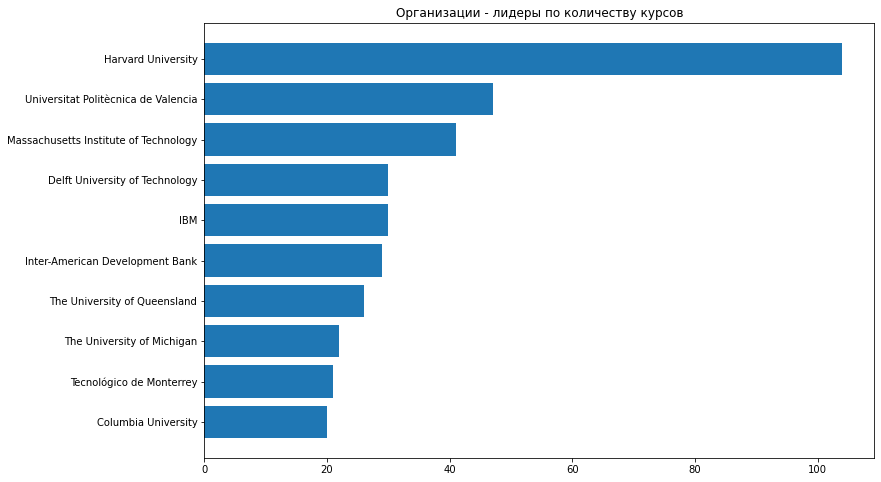

In [113]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

# Для начала исследуем гистограммы по обучающим организациям. Смотрим первые 10 организаций, у которых больше всего курсов
institution_cnt = cdf[['institution', 'title']].groupby(['institution']).count().sort_values('title', ascending=False) \
    .reset_index().head(10)[::-1]
print(institution_cnt)

y_pos = np.arange(10)
plt.title('Организации - лидеры по количеству курсов')
# Bars
plt.barh(y_pos, institution_cnt['title'])

# Заголовки на оси y
plt.yticks(y_pos, institution_cnt['institution'])

# Показываем диаграмму
plt.show()

                             institution  n_enrolled
9                   The Linux Foundation   1001977.0
8            Educational Testing Service   1022489.0
7         Delft University of Technology   1073553.0
6        Inter-American Development Bank   1115101.0
5                    Columbia University   1341270.0
4  Massachusetts Institute of Technology   1547111.0
3     University of California, Berkeley   1840798.0
2    Universitat Politècnica de Valencia   2117083.0
1           The University of Queensland   2301994.0
0                     Harvard University  13459914.0


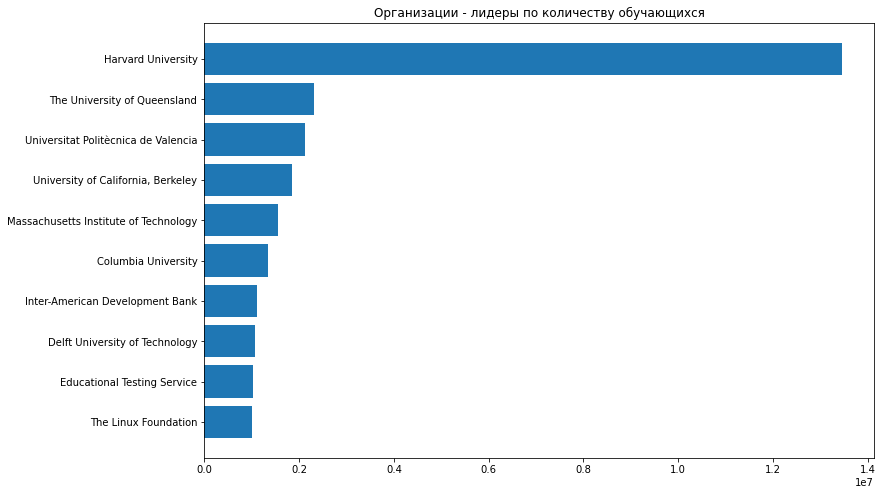

In [114]:
# Теперь смотрим первые 10 организаций, у которых больше всего записавшихся на обучение
institution_cnt = cdf[['institution', 'n_enrolled']].groupby(['institution']).sum().sort_values('n_enrolled', ascending=False) \
    .reset_index().head(10)[::-1]
print(institution_cnt)

y_pos = np.arange(10)
plt.title('Организации - лидеры по количеству обучающихся')
# Bars
plt.barh(y_pos, institution_cnt['title'])

# Заголовки на оси y
plt.yticks(y_pos, institution_cnt['institution'])

# Показываем диаграмму
plt.show()

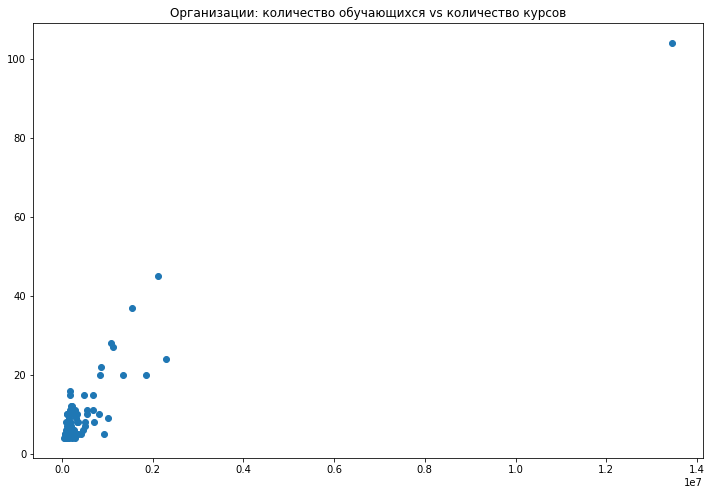

In [127]:
# Сравнение этих двух графиков показывает, что Гарвадр является абсолютным лидером по количеству обучающихся,
# но его лидерство по количеству курсов хоть и заметно, но не настолько резко выражено.
# Также видно, что есть организации, имеющие не рекордное количество курсов, но их курсы более популярны.
# К примеру, Университет Квинсленда, находясь на 7 месте по количеству курсов, на втором по популярности, 
# а Беркли на 4-м, хотя по количеству курсов их нет в первой десятке.
# Попробуем теперь посмотреть на эти же соотношения с помощью ScatterPlot.
# Выделим те организации, у которых более 3 курсов, и сравним их популярность
# groupby('dummy')['returns'].agg(Mean='mean', Sum='sum')
institution_cnt = cdf[['institution', 'n_enrolled']].groupby('institution')['n_enrolled'].agg(Cnt='count', Sum='sum') \
    .reset_index().query('Cnt > 3')
#institution_cnt.head()
plt.title('Организации: количество обучающихся vs количество курсов')
plt.plot( 'Sum', 'Cnt', data=institution_cnt, linestyle='none', marker='o')
plt.show()


                                           institution  Cnt        Sum
85                 Universitat Politècnica de Valencia   45  2117083.0
39               Massachusetts Institute of Technology   37  1547111.0
17                      Delft University of Technology   28  1073553.0
32                     Inter-American Development Bank   27  1115101.0
70                        The University of Queensland   24  2301994.0
26                                                 IBM   22   861234.0
91                  University of California, Berkeley   20  1840798.0
68                          The University of Michigan   20   832941.0
10                                 Columbia University   20  1341270.0
55                            Tecnológico de Monterrey   16   184587.0
12                                   Curtin University   15   493336.0
50                                         SDG Academy   15   168824.0
103                   Wageningen University & Research   15   677670.0
79    

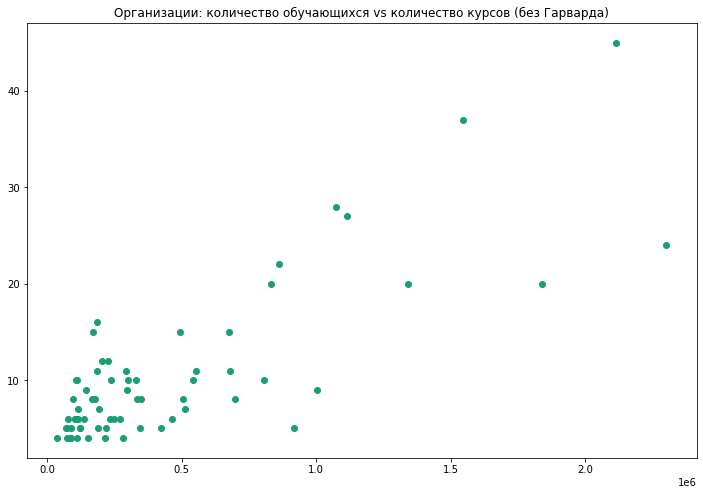

In [130]:
# Эта диаграмма не очень наглядна из-за доминирования Гарварда. Выбросим эту точку и посмотрим, что получится
institution_cnt_2 = institution_cnt.sort_values('Cnt', ascending=False)[1:]
print(institution_cnt_2.head(20))
plt.title('Организации: количество обучающихся vs количество курсов (без Гарварда)')
plt.plot( 'Sum', 'Cnt', data=institution_cnt_2, linestyle='none', marker='o', color='#1B9E77')
plt.show()

In [ ]:
# Эта диаграмма позволяет выделить группу организаций в средней нижней части, у которых при относительно небольшом 
# количестве курсов количество записавшихся на обучение высокое, что может косвенно свидетельствовать 
# или о качестве учебных материалов, или, к примеру, о хорошем маркетинге.
# С другой стороны есть организации, которые размещают в edX много курсов, возможно, не уделяя особого внимания их качеству

In [ ]:
######### Попробуем посмотреть, меняется ли каким-то образом эта картина для разных типов курсов

<AxesSubplot:title={'center':'Количество'}>

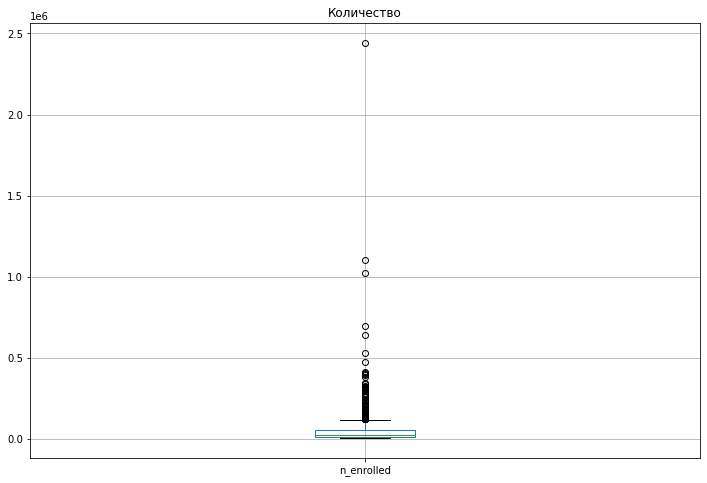

In [131]:
# Попробуем оценить общее распределение количества пользователей, записавшихся на курсы, с помощью Box Plot
cdf['n_enrolled'].plot(kind='box',
                   title='Количество пользователей, записавшихся на курсы', grid=True)
# Видно, что есть как минимум три курса, на которые записалось более миллиона человек. Эти выбросы мешают оценить график

Количество курсов, на которые записалось более 200 000 человек:  40


<AxesSubplot:title={'center':'Количество пользователей, записавшихся на курсы'}>

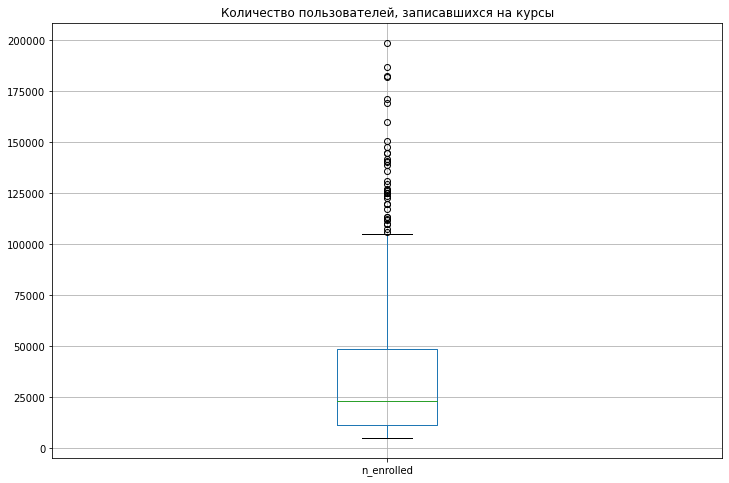

In [138]:
# Попробуем отсечь все курсы,на которые записалось более 200 000 человек, и посмотрим, изменится ли качественно график
print('Количество курсов, на которые записалось более 200 000 человек: ', cdf.query('n_enrolled > 200000')['title'].count())
cdf.query('n_enrolled < 200000')['n_enrolled'].plot(kind='box',
                   title='Количество пользователей, записавшихся на курсы', grid=True)


<AxesSubplot:title={'center':'Количество пользователей, записавшихся на курсы'}>

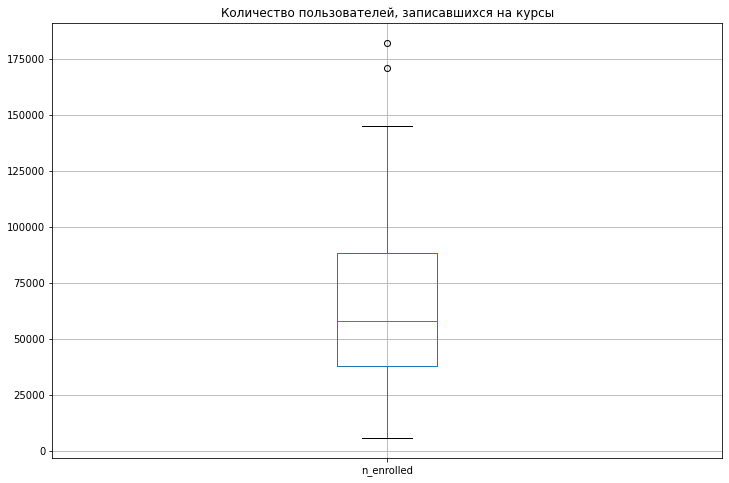

In [142]:
# Сравним эту картинку по всей выборке с данными по Гарварду:
cdf.query('(n_enrolled < 200000) & (institution == "Harvard University")')['n_enrolled'].plot(kind='box',
                   title='Количество пользователей, записавшихся на курсы', grid=True)

<AxesSubplot:xlabel='Level', ylabel='n_enrolled'>

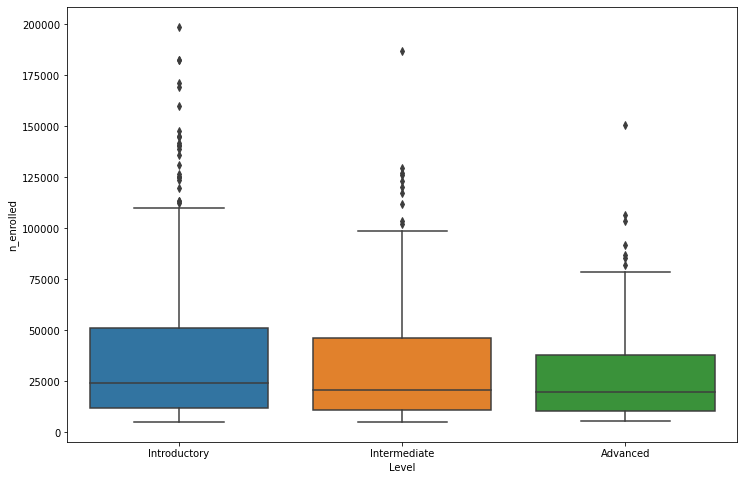

In [149]:
# Попробуем подключить библиотеку SeaBorn и посмотреть еще один вариант Box Plot - диаграммы
import seaborn as sns

# Посмотрим, как выглядит распределение количества обучающихся по трем уровням обучения
cdf2 = cdf[cdf['n_enrolled'] < 200000]
sns.boxplot(data=cdf2,  x=cdf2["Level"], y=cdf2["n_enrolled"] )


In [ ]:
# по графику видно, что в среднем на ознакомительные курсы люди записываются чаще, но незначительно.
# Также видно, что по каждому типу курсов есть длинные хвосты выбросов, видимо, демонстрирующие наличие
# широко востребованных, популярных курсов. Далее попробуем проанализировать направления обучения.

Computer Science              166
Business & Management         164
Data Analysis & Statistics     72
Humanities                     64
Engineering                    58
Social Sciences                51
Economics & Finance            46
Communication                  39
Biology & Life Sciences        35
Language                       34
Medicine                       31
Math                           31
Name: subject, dtype: int64


[Text(0, 0, 'Data Analysis & Statistics'),
 Text(1, 0, 'Computer Science'),
 Text(2, 0, 'Communication'),
 Text(3, 0, 'Business & Management'),
 Text(4, 0, 'Math'),
 Text(5, 0, 'Economics & Finance'),
 Text(6, 0, 'Humanities'),
 Text(7, 0, 'Social Sciences'),
 Text(8, 0, 'Medicine'),
 Text(9, 0, 'Language'),
 Text(10, 0, 'Biology & Life Sciences'),
 Text(11, 0, 'Engineering')]

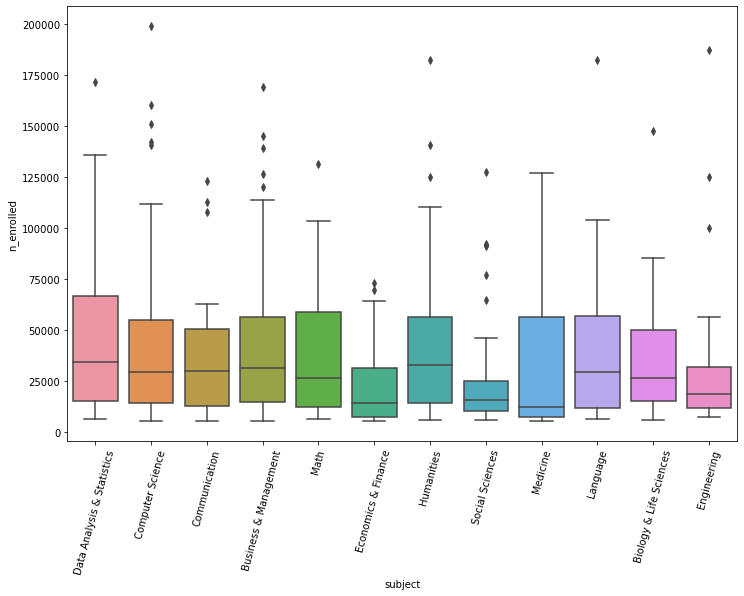

In [159]:
# Определим 12 наиболее популярных направлений
print(cdf['subject'].value_counts().sort_values(ascending=False).head(12))
subjects_12 = cdf['subject'].value_counts().sort_values(ascending=False).head(12).index.values
subjects_12
ax = sns.boxplot(x="subject", y="n_enrolled", 
            data=cdf2[cdf2['subject'].isin(subjects_12)])
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

In [ ]:
# Этот график удобно смотреть в комбинации с информацией о количестве курсов по каждому из этих направлений (табличка выше)
# Можно увидеть, что несмотря на количество предложений менее популярны курсы по социальным наукам, экономике и инженерии, 
# а наиболее востребованы Data Analysis & Statistics, Business & Management, Humanities, Language

Level                       Advanced  Intermediate  Introductory
subject                                                         
Biology & Life Sciences      69494.0      236495.0      869094.0
Business & Management       395102.0     1786640.0     3554162.0
Communication                19717.0      360814.0      663239.0
Computer Science            570830.0     1514046.0     3481197.0
Data Analysis & Statistics  412895.0      725636.0     1304902.0
Economics & Finance          45225.0      279077.0      511605.0
Engineering                 352672.0      495366.0      548801.0
Humanities                   39398.0       54152.0     2390990.0
Language                     24667.0      350884.0      687706.0
Math                             0.0      335695.0      628058.0
Medicine                         0.0      134829.0      597336.0
Social Sciences              49126.0      347359.0      759827.0


<AxesSubplot:xlabel='Level', ylabel='subject'>

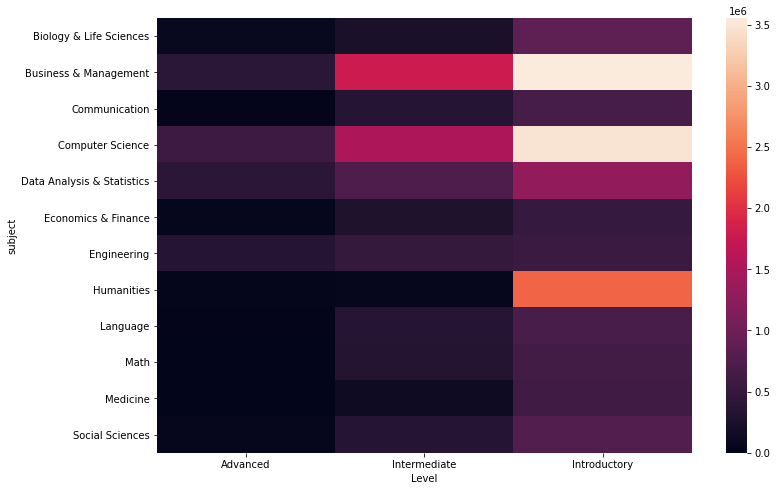

In [162]:
# Посмотрим на то, как эти данные соотносятся с уровнями обучения
subjects_by_levels = cdf2[cdf2['subject'].isin(subjects_12)].pivot_table(
                        index='subject', 
                        columns='Level', 
                        values='n_enrolled', 
                        aggfunc=sum).fillna(0)

print(subjects_by_levels)
sns.heatmap(subjects_by_levels)

In [ ]:
# Эта диаграмма подтверждает выводы по прошлым графикам. Видно, насколько меньше продвинутых курсов по сравнению с остальными
# Также резко выделяются ознакомительные курсы по компьютерным наукам и по бизнес-менеджменту

                         subject      weeks
0                   Philanthropy   4.000000
1                  Communication   5.153846
2                        Science   5.400000
3                          Music   5.428571
4                   Architecture   5.600000
5                Health & Safety   5.636364
6                       Language   5.794118
7                    Electronics   6.000000
8     Data Analysis & Statistics   6.125000
9               Food & Nutrition   6.166667
10  Education & Teacher Training   6.172414
11                    Humanities   6.234375
12           Economics & Finance   6.239130
13                      Medicine   6.451613
14              Computer Science   6.512048
15         Environmental Studies   6.562500
16         Business & Management   6.774390
17       Biology & Life Sciences   6.942857
18               Social Sciences   7.000000
19                          Math   7.096774
20                        Design   7.250000
21                   Engineering

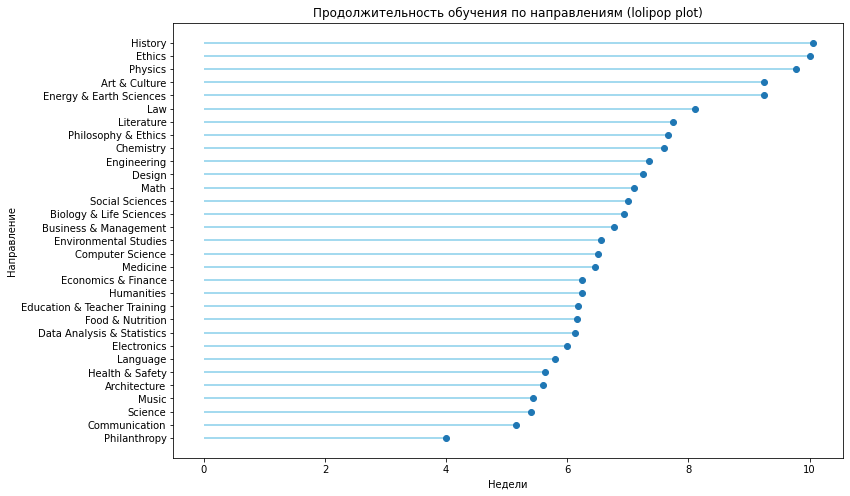

In [178]:
# Проанализируем среднюю продолжительность курсов по направлениям (в неделях)
subjects_in_weeks = cdf[['subject', 'weeks']].groupby('subject').mean().sort_values('weeks', ascending=True).reset_index()
print(subjects_in_weeks)
my_range = range(1, len(subjects_in_weeks)+1)
plt.hlines(y=my_range, xmin=0, xmax=subjects_in_weeks['weeks'], color='skyblue')
plt.plot(subjects_in_weeks['weeks'], my_range, "o")
 
# Задаем параметры
plt.yticks(my_range, subjects_in_weeks['subject'])
plt.title("Продолжительность обучения по направлениям (lolipop plot)", loc='center')
plt.xlabel('Недели')
plt.ylabel('Направление')

# Show the plot
plt.show()

In [ ]:
# Эта диаграмма позволяет увидеть, что наиболее продолжительными оказываются курсы по фундаментальным направлениям,
# В средний сегмент попадают современные технологии, а меньше всего времени затрачивается на курсы общекультурного плана
# (есть и исключения из этого).
# Интересно было бы посмотреть эти же графики для каждого из уровней курсов, но мы не будем :)

                                          effort_mean  certificate      weeks
institution                                                                  
Amazon Web Services                          3.214286    99.000000   4.714286
Amnesty International                        3.500000    49.000000   3.250000
Arizona State University                     8.333333    89.000000  11.000000
Arm Education                                4.500000   149.000000   6.000000
Australian National University               3.000000    49.800000   9.200000
...                                               ...          ...        ...
Western Governors University                 9.500000   333.000000   7.333333
Wits University                              2.857143   121.857143   5.857143
World Bank Group                             3.500000     5.000000   5.000000
edX                                          2.900000    79.000000   2.000000
École polytechnique fédérale de Lausanne     4.166667   164.0000

Text(0.5, 1.0, 'Стоимость обучения в зависимости от длительности и трудоемкости')

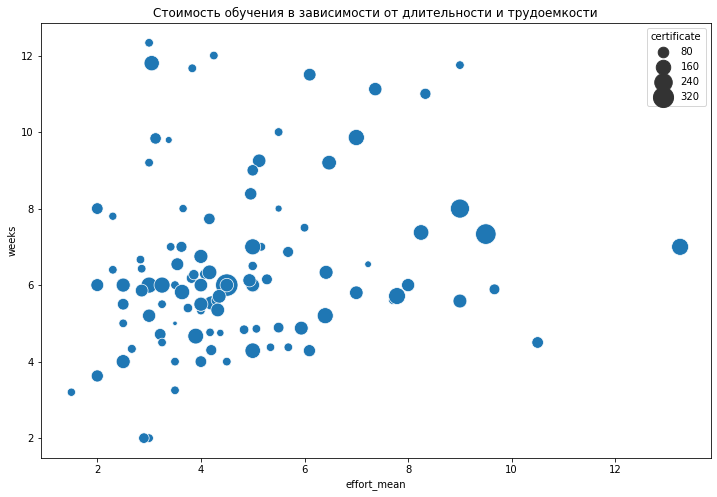

In [194]:
# Проанализируем трудозатраты на обучение (среднее время в часах в неделю), среднюю общую продолжительность обучения
# и связь этих параметров со стоимостью сертификата (размер бабла)
# Будем смотреть на эти данные для обучающих организаций 
institutions_by_efforts = cdf[['institution', 'effort_mean', 'certificate', 'weeks']].groupby('institution') \
    .agg({'effort_mean': 'mean', 'certificate': 'mean', 'weeks': 'mean'})
print(institutions_by_efforts)
ax = sns.scatterplot(data=institutions_by_efforts, x="effort_mean", y="weeks", size="certificate", legend=True, sizes=(20, 500))
ax.set_title('Стоимость обучения в зависимости от длительности и трудоемкости')

                                                    effort_mean  certificate  \
institution                                                                    
Amazon Web Services                                    3.500000     149.0000   
Boston University                                      4.500000     399.0000   
Chalmers University of Technology                     15.000000     259.0000   
Columbia University                                    9.000000     249.0000   
Curtin University                                      9.000000     199.0000   
Delft University of Technology                         8.666667     250.0000   
Delft University of Technology-Wageningen Unive...     7.000000      49.0000   
Harvard University                                     3.000000     149.0000   
IBM                                                    3.000000      99.0000   
Kyoto University                                       2.500000      49.0000   
Massachusetts Institute of Technology   

Text(0.5, 1.0, 'Стоимость обучения в зависимости от длительности и трудоемкости')

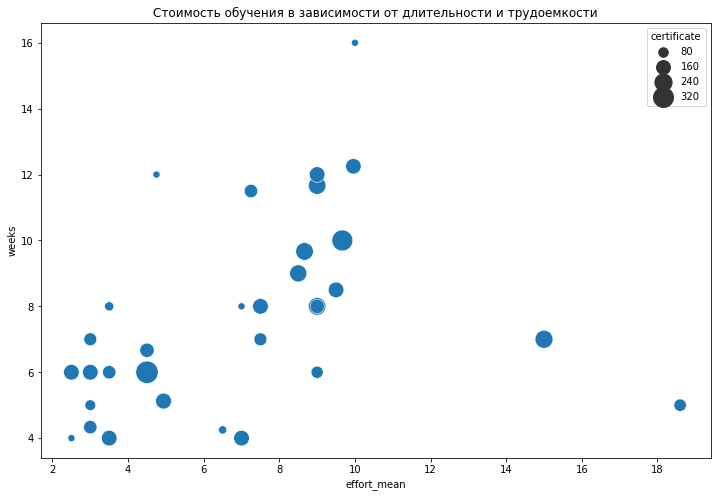

In [210]:
# Видно, что требующие больше усилий курсы как правило дорогие (правая часть диаграммы)
# Также видно, что в центре диаграммы (примерно 6 недель обучения при 4 часах усилий в неделю) много дорогих курсов.
# Более продолжительные курсы по бОльшей части требуют меньше еженедельных усилий
# Тем не менее не все тут однозначно.
# Попробуем посмотреть то же самое только для углубленных курсов :
cdf_3 = cdf[(cdf.Level == "Advanced")]
institutions_by_efforts = cdf_3[['institution', 'effort_mean', 'certificate', 'weeks']].groupby('institution') \
    .agg({'effort_mean': 'mean', 'certificate': 'mean', 'weeks': 'mean'})
print(institutions_by_efforts)
ax = sns.scatterplot(data=institutions_by_efforts, x="effort_mean", y="weeks", size="certificate", legend=True, sizes=(20, 500))
ax.set_title('Стоимость обучения в зависимости от длительности и трудоемкости')

In [ ]:
# При таком фильтре картинка получается интереснее. Во-первых тут гораздо меньше дешевых сертификатов.
# Во-вторых, видна зависимость: чем выше трудоемкость, тем дольше длится курс.
# Наконец, можно увидеть две группы. Относительно легкие курсы, от 2.5 до 5 часов в неделю, длиной в пределах 8 недель
# и группа чуть более дорогих курсов с нагрузкой от 7 до 11 часов в неделю, с учебой от 7 до 13 недель.